# Начальный анализ данных 

In [27]:
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Показать все столбцы и все строки
pd.set_option('display.max_columns', None)   # все столбцы
pd.set_option('display.max_rows', None)      # все строки
pd.set_option('display.width', None)         # не ограничивать ширину вывода
pd.set_option('display.max_colwidth', None)  # не обрезать содержимое ячеек

In [1]:
print ('123')

123


In [3]:
train=pd.read_csv('/home/Indian_rail_way_compitition/railofy-challenge_data/Railofy_training_data_for_model.csv')
train.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,...,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,...,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,...,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,...,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,88312760631,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,...,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,88312449843,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,...,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0


## Предположения по столбикам 

In [7]:
explain_table = pd.read_csv(
    '/home/Indian_rail_way_compitition/railofy-challenge_data/table-13f6970a-2cb3-48ad-9bd8-fc9103351a93-0.csv',
    on_bad_lines='skip',  # пропустить битые строки (pandas >= 1.3)
    encoding='utf-8'
)

In [13]:
explain_table = pd.read_excel(
    '/home/Indian_rail_way_compitition/railofy-challenge_data/table-13f6970a-2cb3-48ad-9bd8-fc9103351a93.xlsx')

In [14]:
explain_table

,Столбец,Вероятная расшифровка / смысл в контексте Indian Railways
0,**`pk`**,"Уникальный идентификатор проезда оси/вагона через датчик (например, `POEZDOUCH_ID` или ID оси)"
1,**`QT`**,"**Quality Type** или **Quadrant Type** — категориальный признак, закодированный как строка (`'GN'`). Возможно, тип датчика, направление движения или зона пути. `'GN'` может означать **""Good Normal""** или **""General""**."
2,**`GRCA`**,"**Gross Ride Condition Assessment** — интегральный показатель плавности хода, основанный на вертикальных/горизонтальных ускорениях."
3,**`CCA`**,"**Car Condition Assessment** — обобщённая оценка состояния вагона (вибрация, удары)."
4,**`JD`**,"**Jerk Deviation** — резкость изменения ускорения (рывок), признак неисправности подвески."
5,**`ODD`**,**Outlier Detection Deviation** — насколько текущие показания датчиков отклоняются от нормы (аномальность).
6,**`JS`**,"**Journal Score** или **Journal Temperature Severity** — ключевой признак! Оценка состояния **осевой шейки (journal)**, где перегрев буксы — главный риск."
7,**`ODS`**,**Outlier Detection Score** — агрегированный балл аномальности (0–1).
8,**`SL`**,**Speed Level** или **Safety Limit flag** — бинарный или нормированный признак: соблюдение скоростного режима (1 = в пределах нормы).
9,**`NDTD`**,**Normalized Distance to Defect** — насколько «близко» система к порогу отказа (чем выше — тем ближе к аварии).


In [5]:
train.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,0.409357,0.167464,1.000539,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,0.409357,0.157895,1.000539,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,0.101124,0.010204,0.196907,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,88312760631,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,0.328710,0.010960,0.678897,0.148338,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,88312449843,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,0.560000,0.227723,1.621770,2.129082,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0


### Какова структура данных?

In [24]:
print("Форма данных:", train.shape)
print("\nТипы данных:")
print(train.dtypes.value_counts())

print("\nПервые 3 строки:")
train.head(3)

Форма данных: (36775, 25)

Типы данных:
float64    17
int64       7
object      1
Name: count, dtype: int64

Первые 3 строки:


,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,0.409357,0.167464,1.000539,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,0.409357,0.157895,1.000539,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,0.101124,0.010204,0.196907,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0


### Пропущенные значения

In [25]:
missing = train.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("✅ Пропусков нет!")
else:
    print("Пропущенные значения:")
    print(missing)

✅ Пропусков нет!


### Целевая переменная

Распределение target:
target
0    0.685167
1    0.314833
Name: proportion, dtype: float64


2025-11-09 16:56:54,784 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-09 16:56:54,866 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


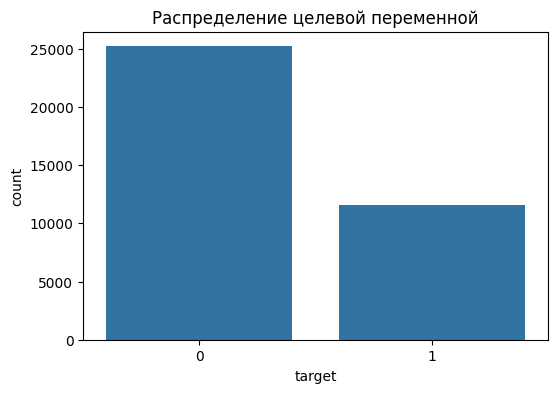

In [28]:
target_dist = train['target'].value_counts(normalize=True)
print("Распределение target:")
print(target_dist)

# Визуализация
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='target')
plt.title('Распределение целевой переменной')
plt.show()

### Категориальный признак 

Уникальные значения QT:
QT
GN    26576
RL     6648
PQ     3551
Name: count, dtype: int64

Доля target=1 по категориям QT:
target         0         1
QT                        
GN      0.736642  0.263358
PQ      0.559279  0.440721
RL      0.546631  0.453369


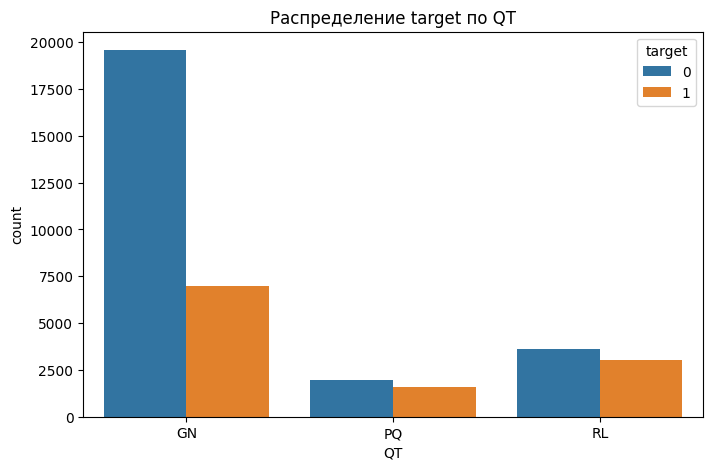

In [29]:
print("Уникальные значения QT:")
print(train['QT'].value_counts())

# Связь с target
qt_target = pd.crosstab(train['QT'], train['target'], normalize='index')
print("\nДоля target=1 по категориям QT:")
print(qt_target)

# Визуализация
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='QT', hue='target')
plt.title('Распределение target по QT')
plt.show()

### Распределение числовых признаков

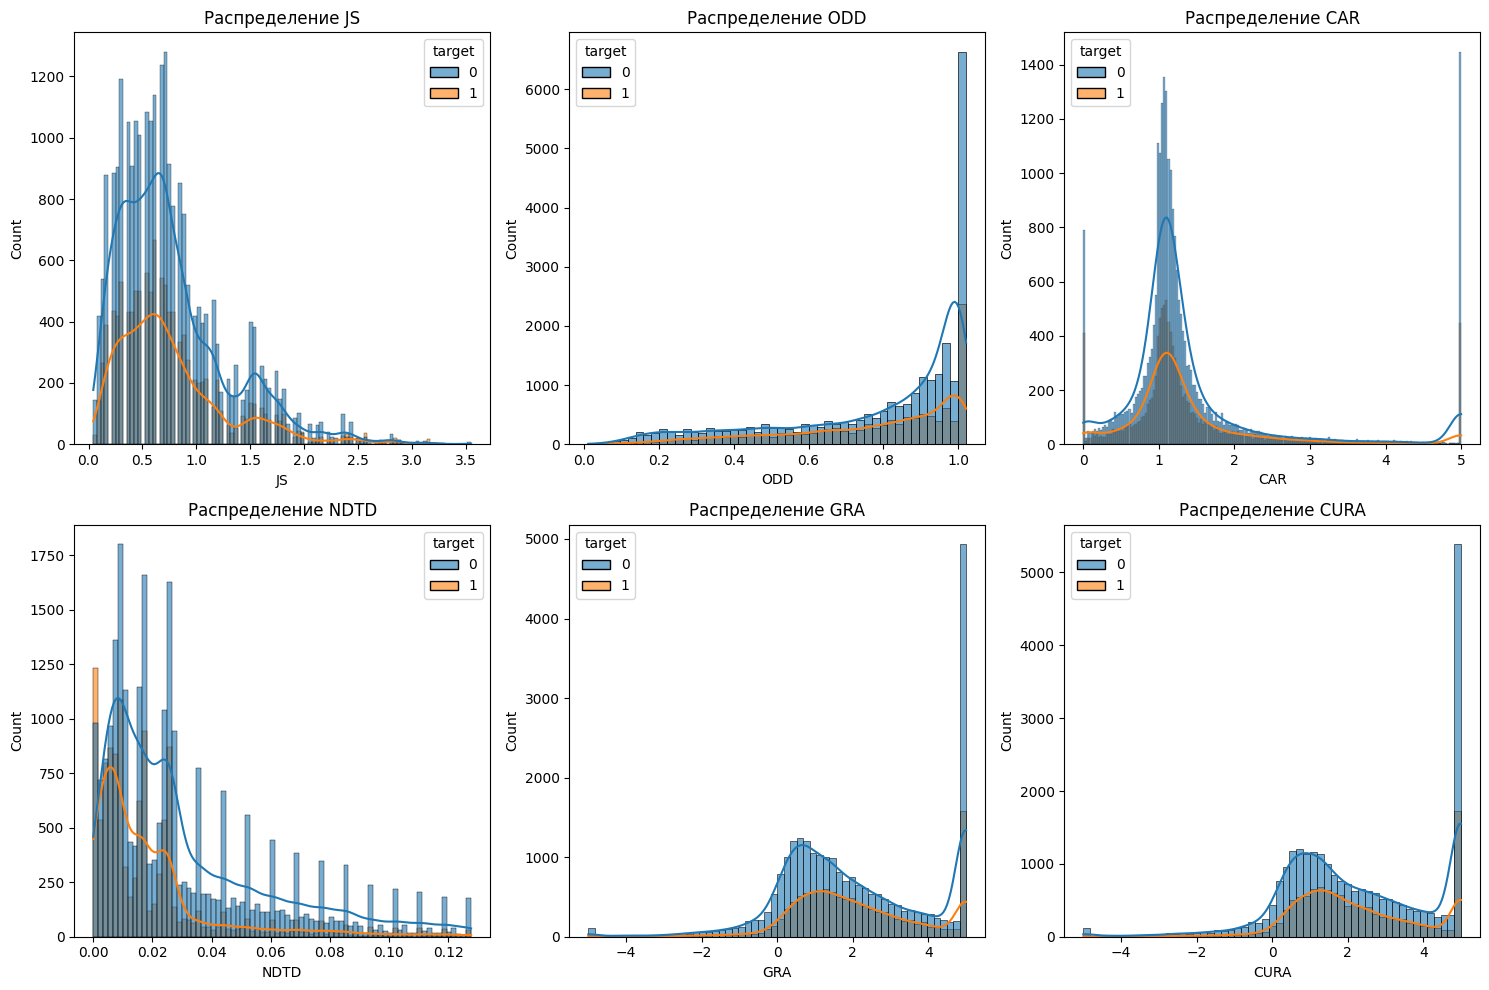

In [30]:
num_cols = ['JS', 'ODD', 'CAR', 'NDTD', 'GRA', 'CURA']  # можно добавить больше

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data=train, x=col, hue='target', kde=True, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Распределение {col}')

plt.tight_layout()
plt.show()

Корреляции с target

Топ-10 признаков по корреляции с target:
GROP     0.292825
CURP     0.249564
RPW      0.220224
NDTD     0.205912
CANP     0.187013
CUCA     0.163946
GRCA     0.128198
CCA      0.096520
pk       0.076924
BKT_2    0.061989
Name: target, dtype: float64


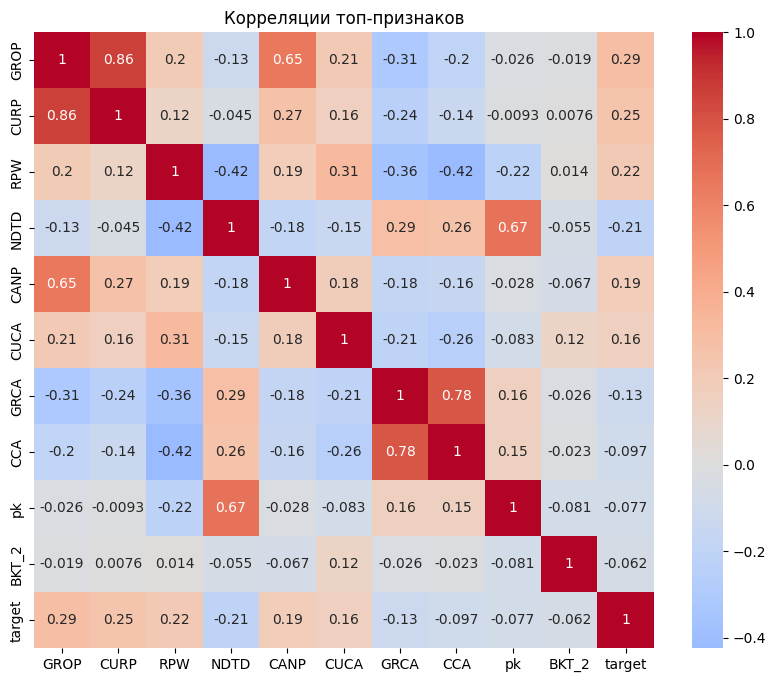

In [31]:
# Вычислим корреляцию Пирсона с target
corr_with_target = train.select_dtypes(include=[np.number]).corr()['target'].abs().sort_values(ascending=False)

print("Топ-10 признаков по корреляции с target:")
print(corr_with_target[1:11])  # пропускаем сам target

# Тепловая карта для топ-признаков
top_features = corr_with_target[1:11].index.tolist() + ['target']
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляции топ-признаков')
plt.show()

 ### Анализ кластеров и групп (CL_1, CL_2, CL_3, BKT_2)

Доля отказов по кластерам:
cluster
CL_1    0.335667
CL_2    0.279160
CL_3    0.262724
Name: target, dtype: float64


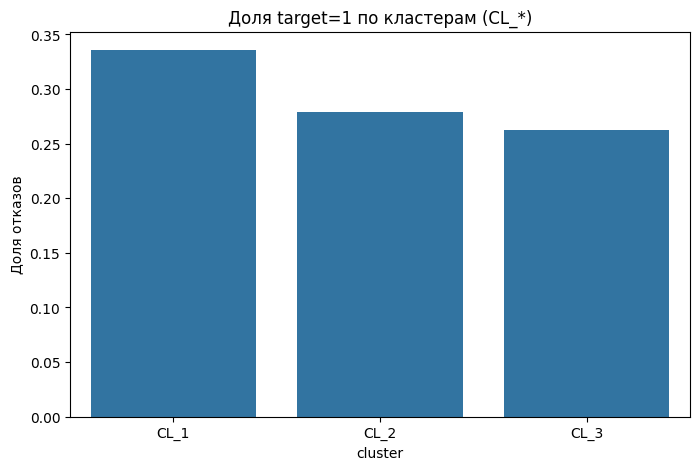

In [32]:
# Восстановим исходный категориальный признак из one-hot
train['cluster'] = train[['CL_1', 'CL_2', 'CL_3']].idxmax(axis=1)
train['bucket'] = train['BKT_2'].map({0: 'BKT_1_or_3', 1: 'BKT_2'})

# Распределение отказов по кластерам
cluster_target = train.groupby('cluster')['target'].mean()
print("Доля отказов по кластерам:")
print(cluster_target)

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_target.index, y=cluster_target.values)
plt.title('Доля target=1 по кластерам (CL_*)')
plt.ylabel('Доля отказов')
plt.show()

In [34]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

# -------------------------------------------------
# 1. ЗАГРУЗКА ДАННЫХ
# -------------------------------------------------
train = pd.read_csv('/home/Indian_rail_way_compitition/railofy-challenge_data/Railofy_training_data_for_model.csv')

# -------------------------------------------------
# 2. ПОДГОТОВКА ДАННЫХ
# -------------------------------------------------
# Целевая переменная
y = train['target']

# Признаки: убираем pk и target
X = train.drop(['pk', 'target'], axis=1)

# Определяем категориальные признаки (в вашем датасете — только 'QT')
categorical_features = ['QT']

# Убедимся, что QT — строка (CatBoost требует string или int для категорий)
X['QT'] = X['QT'].astype(str)

# -------------------------------------------------
# 3. НАСТРОЙКИ МОДЕЛИ
# -------------------------------------------------
# Автоматически вычислим веса классов для борьбы с дисбалансом
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(np.unique(y), class_weights))

# Параметры CatBoost
params = {
    'iterations': 500,
    'depth': 6,
    'learning_rate': 0.03,
    'random_seed': 42,
    'verbose': 100,  # вывод каждые 100 итераций
    'loss_function': 'Logloss',
    'eval_metric': 'F1',  # CatBoost будет отслеживать F1 при обучении
    'class_weights': class_weights_dict,
    'task_type': 'CPU',  # или 'GPU', если есть
    'early_stopping_rounds': 50  # остановка, если нет улучшения
}

# -------------------------------------------------
# 4. КРОСС-ВАЛИДАЦИЯ ДЛЯ ОЦЕНКИ F1
# -------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

print("Запуск кросс-валидации...\n")

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model = CatBoostClassifier(
        **params,
        cat_features=categorical_features
    )
    
    model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        use_best_model=True,
        verbose=100
    )
    
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)
    print(f"Fold {fold + 1} — F1: {f1:.4f}\n")

print(f"Средний F1 по CV: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

Запуск кросс-валидации...

0:	learn: 0.7294914	test: 0.7277953	best: 0.7277953 (0)	total: 122ms	remaining: 1m
100:	learn: 0.7781493	test: 0.7667538	best: 0.7679584 (97)	total: 3.61s	remaining: 14.3s
200:	learn: 0.8052822	test: 0.7899611	best: 0.7899611 (200)	total: 6.99s	remaining: 10.4s
300:	learn: 0.8234483	test: 0.8011706	best: 0.8013688 (293)	total: 10.3s	remaining: 6.81s
400:	learn: 0.8383536	test: 0.8117952	best: 0.8117952 (398)	total: 13.6s	remaining: 3.36s
499:	learn: 0.8507499	test: 0.8218302	best: 0.8223345 (496)	total: 16.8s	remaining: 0us

bestTest = 0.8223345064
bestIteration = 496

Shrink model to first 497 iterations.
Fold 1 — F1: 0.7410

0:	learn: 0.7207717	test: 0.7121639	best: 0.7121639 (0)	total: 48.3ms	remaining: 24.1s
100:	learn: 0.7786346	test: 0.7779662	best: 0.7779662 (100)	total: 3.28s	remaining: 13s
200:	learn: 0.8018005	test: 0.7997096	best: 0.7997096 (200)	total: 6.69s	remaining: 9.96s
300:	learn: 0.8186160	test: 0.8140894	best: 0.8142609 (299)	total: 10.1s	

### Анализ важности признаков 

In [36]:
# Обучим финальную модель на всём train
final_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.03,
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=class_weights_dict,
    cat_features=['QT'],
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)

final_model.fit(X, y)

0:	learn: 0.6949808	total: 101ms	remaining: 50.3s
100:	learn: 0.7770373	total: 3.9s	remaining: 15.4s
200:	learn: 0.7997423	total: 7.43s	remaining: 11s
300:	learn: 0.8190973	total: 11s	remaining: 7.29s
400:	learn: 0.8333288	total: 14.3s	remaining: 3.54s
499:	learn: 0.8454344	total: 17.6s	remaining: 0us


   Feature Id  Importances
0        CURP    16.079989
1        GROP     8.971185
2        GRCA     8.554465
3        NDTD     8.187512
4         ODD     5.561519
5          JD     5.086997
6          QT     4.960868
7        SBRA     4.829792
8          SL     4.293400
9        CUCA     4.095083
10        CCA     4.088048
11       SCRA     3.933394
12        RPW     3.371160
13       CANP     3.223479
14         JS     3.023954


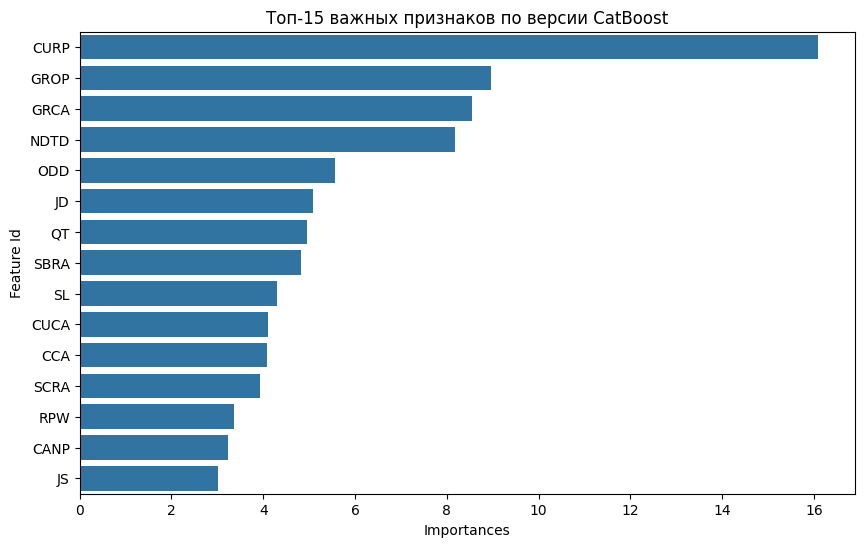

In [37]:
feature_importance = final_model.get_feature_importance(prettified=True)
print(feature_importance.head(15))

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(15), y='Feature Id', x='Importances')
plt.title('Топ-15 важных признаков по версии CatBoost')
plt.show()

In [38]:
explain_table

,Столбец,Вероятная расшифровка / смысл в контексте Indian Railways
0,**`pk`**,"Уникальный идентификатор проезда оси/вагона через датчик (например, `POEZDOUCH_ID` или ID оси)"
1,**`QT`**,"**Quality Type** или **Quadrant Type** — категориальный признак, закодированный как строка (`'GN'`). Возможно, тип датчика, направление движения или зона пути. `'GN'` может означать **""Good Normal""** или **""General""**."
2,**`GRCA`**,"**Gross Ride Condition Assessment** — интегральный показатель плавности хода, основанный на вертикальных/горизонтальных ускорениях."
3,**`CCA`**,"**Car Condition Assessment** — обобщённая оценка состояния вагона (вибрация, удары)."
4,**`JD`**,"**Jerk Deviation** — резкость изменения ускорения (рывок), признак неисправности подвески."
5,**`ODD`**,**Outlier Detection Deviation** — насколько текущие показания датчиков отклоняются от нормы (аномальность).
6,**`JS`**,"**Journal Score** или **Journal Temperature Severity** — ключевой признак! Оценка состояния **осевой шейки (journal)**, где перегрев буксы — главный риск."
7,**`ODS`**,**Outlier Detection Score** — агрегированный балл аномальности (0–1).
8,**`SL`**,**Speed Level** или **Safety Limit flag** — бинарный или нормированный признак: соблюдение скоростного режима (1 = в пределах нормы).
9,**`NDTD`**,**Normalized Distance to Defect** — насколько «близко» система к порогу отказа (чем выше — тем ближе к аварии).


In [42]:
train.head(15)

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,0.409357,0.167464,1.000539,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,0.409357,0.157895,1.000539,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,0.101124,0.010204,0.196907,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,88312760631,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,0.328710,0.010960,0.678897,0.148338,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,88312449843,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,0.560000,0.227723,1.621770,2.129082,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0
5,88311989785,GN,4.004756,2.818629,0.714982,1.000000,0.088679,0.666667,1,0.043859,0.229039,0.314928,0.077922,1.118245,1.362809,1.836390,4.727056,0.270767,1.642398,0.917572,0,0,1,0,0
6,88311492512,GN,3.537944,1.578074,0.419422,1.000000,0.354716,0.888889,0,0.008333,0.002315,0.041667,0.037778,1.069129,1.267060,1.827951,2.601948,0.270086,0.361871,0.245700,0,0,1,0,0
7,88311121901,GN,5.000000,1.033556,0.419422,0.944231,0.354716,0.800000,0,0.005552,0.079295,0.135095,0.049159,1.069129,1.267060,0.909708,1.092190,0.267730,0.111633,0.291989,0,0,1,0,0
8,88310864991,GN,1.400436,0.902846,1.417151,0.979917,0.665093,0.882353,1,0.004161,0.222222,0.432749,0.169014,1.204004,1.650755,1.314031,1.727156,0.285433,-0.294021,1.063010,0,0,1,0,0
9,88310864992,GN,1.400436,0.902846,1.417151,0.979917,0.665093,0.882353,1,0.016660,0.263158,0.432749,0.136150,1.204004,1.650755,2.081256,3.263986,0.280196,-0.294021,0.929712,0,0,1,0,0


### Добавим новые признаки 

In [43]:
# Примеры новых признаков
X['CURP_squared'] = X['CURP'] ** 2
X['GROP_high'] = (X['GROP'] > X['GROP'].quantile(0.9)).astype(int)  # флаг сильного износа
X['CURP_x_GROP'] = X['CURP'] * X['GROP']  # комбинированный риск
X['CURP_ratio'] = X['CURP'] / (X['NDTD'] + 1e-6)  # нормировка по "дистанции до отказа"

Используйте бинарные флаги для экстремальных значений   

In [44]:
# Пример: верхние 5% — считаем аномалией
for col in ['CURP', 'GROP', 'GRCA', 'NDTD']:
    threshold = X[col].quantile(0.95)
    X[f'{col}_extreme'] = (X[col] > threshold).astype(int)

 Настройте порог предсказания (не 0.5!)
CatBoost по умолчанию использует порог 0.5, но при дисбалансе это почти всегда неоптимально.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Разделите train на train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Обучите модель
model = CatBoostClassifier(
    cat_features=['QT'],
    class_weights=class_weights_dict,
    verbose=0,
    random_seed=42
)
model.fit(X_train, y_train)

# Подберите лучший порог
proba = model.predict_proba(X_val)[:, 1]
best_f1, best_th = 0, 0.5
for th in np.arange(0.1, 0.6, 0.01):  # ищем в зоне низких порогов
    pred = (proba >= th).astype(int)
    f1 = f1_score(y_val, pred)
    if f1 > best_f1:
        best_f1, best_th = f1, th

print(f"Оптимальный порог: {best_th:.3f}, F1: {best_f1:.4f}")

Оптимальный порог: 0.550, F1: 0.8135


2025-11-09 17:34:42,418 - INFO     - Executing shutdown due to inactivity...
2025-11-09 17:34:42,453 - INFO     - Executing shutdown...
2025-11-09 17:34:42,457 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [49]:
y.mean()

0.3148334466349422

In [52]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier

# -------------------------------------------------
# 1. ЗАГРУЗКА ДАННЫХ
# -------------------------------------------------
# Обучение
train = pd.read_csv('/home/Indian_rail_way_compitition/railofy-challenge_data/Railofy_training_data_for_model.csv')
# Тест
test = pd.read_csv('/home/Indian_rail_way_compitition/railofy-challenge_data/Railofy_training_data_for_model.csv')

# -------------------------------------------------
# 2. ПОДГОТОВКА ДАННЫХ
# -------------------------------------------------
# --- Обучение ---
y = train['target']
X = train.drop(['pk', 'target'], axis=1)
X['QT'] = X['QT'].astype(str)

# --- Тест ---
test_features = test.drop(['pk'], axis=1)
test_features['QT'] = test_features['QT'].astype(str)  # <-- это нужно!

# -------------------------------------------------
# 3. ВЫЧИСЛЕНИЕ class_weights (как в обучении)
# -------------------------------------------------
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(np.unique(y), class_weights))

# -------------------------------------------------
# 4. ОБУЧЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ
# -------------------------------------------------
final_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.03,
    cat_features=['QT'],
    class_weights=class_weights_dict,
    random_seed=42,
    verbose=100
)
final_model.fit(X, y)

# -------------------------------------------------
# 5. ПРЕДСКАЗАНИЕ НА ТЕСТЕ
# -------------------------------------------------
test_proba = final_model.predict_proba(test_features)[:, 1]
test_pred = (test_proba >= 0.55).astype(int)

# -------------------------------------------------
# 6. СОХРАНЕНИЕ SUBMISSION
# -------------------------------------------------
submission = pd.DataFrame({
    'pk': test['pk'],
    'target': test_pred
})
submission.to_csv('submission_catboost_f1_81.csv', index=False)

print("✅ Submission сохранён!")

0:	learn: 0.6849646	total: 28.8ms	remaining: 14.4s
100:	learn: 0.4932111	total: 2.67s	remaining: 10.6s
200:	learn: 0.4538049	total: 5.15s	remaining: 7.67s
300:	learn: 0.4261882	total: 7.69s	remaining: 5.08s
400:	learn: 0.4029796	total: 10.2s	remaining: 2.52s
499:	learn: 0.3824778	total: 12.7s	remaining: 0us
✅ Submission сохранён!


In [53]:
# Финальная модель на всём train
final_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.03,
    cat_features=['QT'],
    class_weights=class_weights_dict,
    random_seed=42,
    verbose=100
)
final_model.fit(X, y)

# Предсказание на test
test_proba = final_model.predict_proba(test_features)[:, 1]
test_pred = (test_proba >= 0.55).astype(int)

# Сохранить
submission = pd.DataFrame({'pk': test['pk'], 'target': test_pred})
submission.to_csv('submission_catboost_f1_81.csv', index=False)

0:	learn: 0.6849646	total: 33ms	remaining: 16.5s
100:	learn: 0.4932111	total: 2.64s	remaining: 10.4s
200:	learn: 0.4538049	total: 5.06s	remaining: 7.53s
300:	learn: 0.4261882	total: 7.51s	remaining: 4.97s
400:	learn: 0.4029796	total: 9.89s	remaining: 2.44s
499:	learn: 0.3824778	total: 12.3s	remaining: 0us


In [54]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'depth': trial.suggest_int('depth', 4, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'verbose': 0,
        'cat_features': ['QT'],
        'class_weights': class_weights_dict
    }
    
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []
    
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model = CatBoostClassifier(**params)
        model.fit(X_train, y_train)
        
        proba = model.predict_proba(X_val)[:, 1]
        pred = (proba >= 0.55).astype(int)  # фиксируем ваш лучший порог!
        f1_scores.append(f1_score(y_val, pred))
    
    return np.mean(f1_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Лучшие параметры:", study.best_params)
print("Лучший F1:", study.best_value)

[I 2025-11-09 18:14:38,836] A new study created in memory with name: no-name-982950a3-b33a-4957-b812-1255847afff8
[I 2025-11-09 18:15:17,556] Trial 0 finished with value: 0.743863716425139 and parameters: {'iterations': 932, 'depth': 4, 'learning_rate': 0.038259175116658196, 'l2_leaf_reg': 5.976746755977714}. Best is trial 0 with value: 0.743863716425139.
[I 2025-11-09 18:15:52,725] Trial 1 finished with value: 0.7052421535252472 and parameters: {'iterations': 840, 'depth': 4, 'learning_rate': 0.018198487657874712, 'l2_leaf_reg': 8.813008692463423}. Best is trial 0 with value: 0.743863716425139.
[I 2025-11-09 18:16:27,240] Trial 2 finished with value: 0.7604001658920274 and parameters: {'iterations': 822, 'depth': 4, 'learning_rate': 0.06121656525707048, 'l2_leaf_reg': 7.294772127495501}. Best is trial 2 with value: 0.7604001658920274.
[I 2025-11-09 18:16:59,327] Trial 3 finished with value: 0.7423280910156591 and parameters: {'iterations': 561, 'depth': 6, 'learning_rate': 0.027479120

Лучшие параметры: {'iterations': 582, 'depth': 8, 'learning_rate': 0.09128425961115805, 'l2_leaf_reg': 1.1010164104264168}
Лучший F1: 0.8712247482341025


проверка новых фичей 

In [56]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

# -------------------------------------------------
# 1. ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ
# -------------------------------------------------
train = pd.read_csv('/home/Indian_rail_way_compitition/railofy-challenge_data/Railofy_training_data_for_model.csv')

y = train['target']
X_base = train.drop(['pk', 'target'], axis=1)
X_base['QT'] = X_base['QT'].astype(str)

# -------------------------------------------------
# 2. ФУНКЦИЯ ДОБАВЛЕНИЯ НОВЫХ ПРИЗНАКОВ
# -------------------------------------------------
def add_new_features(df):
    df = df.copy()
    # Квадраты
    df['CURP_sq'] = df['CURP'] ** 2
    df['GROP_sq'] = df['GROP'] ** 2
    
    # Экстремальные значения (верхние 10% и 5%)
    df['CURP_high'] = (df['CURP'] > df['CURP'].quantile(0.90)).astype(int)
    df['GROP_high'] = (df['GROP'] > df['GROP'].quantile(0.90)).astype(int)
    df['CURP_extreme'] = (df['CURP'] > df['CURP'].quantile(0.95)).astype(int)
    df['GROP_extreme'] = (df['GROP'] > df['GROP'].quantile(0.95)).astype(int)
    
    # Взаимодействия
    df['CURP_x_GROP'] = df['CURP'] * df['GROP']
    df['CURP_div_NDTD'] = df['CURP'] / (df['NDTD'] + 1e-6)
    df['GROP_div_NDTD'] = df['GROP'] / (df['NDTD'] + 1e-6)
    
    # Комплексный риск (на основе важных признаков)
    df['wheel_risk'] = df['CURP'] * df['GROP'] * df['RPW']
    
    return df

X_new = add_new_features(X_base)

# -------------------------------------------------
# 3. НАСТРОЙКИ
# -------------------------------------------------
categorical_features = ['QT']
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(np.unique(y), class_weights))

def evaluate_model(X, name):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    best_thresholds = []
    
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model = CatBoostClassifier(
            iterations=500,
            depth=6,
            learning_rate=0.03,
            cat_features=categorical_features,
            class_weights=class_weights_dict,
            random_seed=42,
            verbose=0
        )
        model.fit(X_train, y_train)
        
        # Подбор лучшего порога на валидации
        proba = model.predict_proba(X_val)[:, 1]
        best_f1, best_th = 0, 0.5
        for th in np.arange(0.4, 0.7, 0.01):
            pred = (proba >= th).astype(int)
            f1 = f1_score(y_val, pred)
            if f1 > best_f1:
                best_f1, best_th = f1, th
        f1_scores.append(best_f1)
        best_thresholds.append(best_th)
    
    print(f"\n{name}:")
    print(f"  Средний F1: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"  Средний порог: {np.mean(best_thresholds):.3f}")
    return np.mean(f1_scores), np.mean(best_thresholds)

# -------------------------------------------------
# 4. ЗАПУСК ЭКСПЕРИМЕНТА
# -------------------------------------------------
print("🔍 Проверка полезности новых признаков")
f1_base, th_base = evaluate_model(X_base, "Baseline (исходные признаки)")
f1_new, th_new = evaluate_model(X_new, "С новыми признаками")

print("\n" + "="*50)
print(f"Прирост F1: {f1_new - f1_base:.4f}")
if f1_new > f1_base:
    print("✅ Новые признаки УЛУЧШАЮТ модель!")
else:
    print("❌ Новые признаки НЕ помогают (или даже вредят).")

🔍 Проверка полезности новых признаков

Baseline (исходные признаки):
  Средний F1: 0.7457 ± 0.0041
  Средний порог: 0.528

С новыми признаками:
  Средний F1: 0.7450 ± 0.0051
  Средний порог: 0.546

Прирост F1: -0.0007
❌ Новые признаки НЕ помогают (или даже вредят).


Пробуем ансамль моделей 

In [61]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# -------------------------------------------------
# 1. ЗАГРУЗКА И ПОДГОТОВКА
# -------------------------------------------------
train = pd.read_csv('/home/Indian_rail_way_compitition/railofy-challenge_data/Railofy_training_data_for_model.csv')
y = train['target']
X = train.drop(['pk', 'target'], axis=1)

# Кодируем QT для LightGBM и XGBoost (они не принимают строки)
X_prep = X.copy()
le = LabelEncoder()
X_prep['QT'] = le.fit_transform(X['QT'])

# Class weights для баланса
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))
sample_weight = np.where(y == 1, class_weight_dict[1], class_weight_dict[0])

# -------------------------------------------------
# 2. ЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ КАЖДОЙ МОДЕЛИ
# -------------------------------------------------
cb_params = {
    'iterations': 582,
    'depth': 8,
    'learning_rate': 0.0913,
    'l2_leaf_reg': 1.1,
    'cat_features': [X.columns.get_loc('QT')],  # индекс колонки QT
    'verbose': 0,
    'random_seed': 42
}

lgbm_params = {
    'n_estimators': 600,
    'max_depth': 7,
    'learning_rate': 0.05,
    'num_leaves': 63,
    'class_weight': 'balanced',
    'random_state': 42,
    'verbosity': -1
}

xgb_params = {
    'n_estimators': 600,
    'max_depth': 6,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': class_weight_dict[1] / class_weight_dict[0],  # для XGBoost
    'random_state': 42,
    'verbosity': 0
}

# -------------------------------------------------
# 3. АНСАМБЛЬ С КРОСС-ВАЛИДАЦИЕЙ
# -------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

print("Запуск CV для ансамбля...")

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    # Разделение
    X_train_cb = X.iloc[train_idx]
    X_val_cb = X.iloc[val_idx]
    X_train_others = X_prep.iloc[train_idx]
    X_val_others = X_prep.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    w_train = sample_weight[train_idx]
    
    # --- CatBoost (работает со строками) ---
    cb = CatBoostClassifier(**cb_params)
    cb.fit(X_train_cb, y_train, verbose=0)
    cb_proba = cb.predict_proba(X_val_cb)[:, 1]
    
    # --- LightGBM ---
    lgbm = LGBMClassifier(**lgbm_params)
    lgbm.fit(X_train_others, y_train, sample_weight=w_train)
    lgbm_proba = lgbm.predict_proba(X_val_others)[:, 1]
    
    # --- XGBoost ---
    xgb = XGBClassifier(**xgb_params)
    xgb.fit(X_train_others, y_train, sample_weight=w_train)
    xgb_proba = xgb.predict_proba(X_val_others)[:, 1]
    
    # --- Ансамбль: среднее вероятностей ---
    ensemble_proba = (cb_proba + lgbm_proba + xgb_proba) / 3.0
    
    # --- Подбор лучшего порога ---
    best_f1, best_th = 0, 0.5
    for th in np.arange(0.45, 0.65, 0.01):
        pred = (ensemble_proba >= th).astype(int)
        f1 = f1_score(y_val, pred)
        if f1 > best_f1:
            best_f1, best_th = f1, th
    
    f1_scores.append(best_f1)
    print(f"Fold {fold+1} — F1: {best_f1:.4f} (порог: {best_th:.2f})")

print(f"\n✅ Средний F1 ансамбля: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

Запуск CV для ансамбля...
Fold 1 — F1: 0.8719 (порог: 0.60)
Fold 2 — F1: 0.8806 (порог: 0.60)
Fold 3 — F1: 0.8706 (порог: 0.57)
Fold 4 — F1: 0.8711 (порог: 0.63)
Fold 5 — F1: 0.8767 (порог: 0.61)

✅ Средний F1 ансамбля: 0.8742 ± 0.0039


 взвешенный ансамбль + Optuna

In [62]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import optuna

# -------------------------------------------------
# 1. ЗАГРУЗКА И ПОДГОТОВКА
# -------------------------------------------------
train = pd.read_csv('/home/Indian_rail_way_compitition/railofy-challenge_data/Railofy_training_data_for_model.csv')
y = train['target']
X = train.drop(['pk', 'target'], axis=1)

X_prep = X.copy()
le = LabelEncoder()
X_prep['QT'] = le.fit_transform(X['QT'])

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))
sample_weight = np.where(y == 1, class_weight_dict[1], class_weight_dict[0])

# -------------------------------------------------
# 2. ПАРАМЕТРЫ МОДЕЛЕЙ (из предыдущих экспериментов)
# -------------------------------------------------
cb_params = {
    'iterations': 582,
    'depth': 8,
    'learning_rate': 0.0913,
    'l2_leaf_reg': 1.1,
    'cat_features': [X.columns.get_loc('QT')],
    'verbose': 0,
    'random_seed': 42
}

lgbm_params = {
    'n_estimators': 600,
    'max_depth': 7,
    'learning_rate': 0.05,
    'num_leaves': 63,
    'class_weight': 'balanced',
    'random_state': 42,
    'verbosity': -1
}

xgb_params = {
    'n_estimators': 600,
    'max_depth': 6,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': class_weight_dict[1] / class_weight_dict[0],
    'random_state': 42,
    'verbosity': 0
}

# -------------------------------------------------
# 3. ОБУЧЕНИЕ МОДЕЛЕЙ НА ВСЕХ ДАННЫХ (для получения предсказаний на CV)
# -------------------------------------------------
# Мы будем использовать out-of-fold предсказания
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Заготовки для OOF-предсказаний
oof_cb = np.zeros(len(X))
oof_lgbm = np.zeros(len(X))
oof_xgb = np.zeros(len(X))

print("Генерация out-of-fold предсказаний...")

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    print(f"  Fold {fold+1}/5")
    
    # Данные
    X_train_cb = X.iloc[train_idx]
    X_val_cb = X.iloc[val_idx]
    X_train_others = X_prep.iloc[train_idx]
    X_val_others = X_prep.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    w_train = sample_weight[train_idx]
    
    # CatBoost
    cb = CatBoostClassifier(**cb_params)
    cb.fit(X_train_cb, y_train, verbose=0)
    oof_cb[val_idx] = cb.predict_proba(X_val_cb)[:, 1]
    
    # LightGBM
    lgbm = LGBMClassifier(**lgbm_params)
    lgbm.fit(X_train_others, y_train, sample_weight=w_train)
    oof_lgbm[val_idx] = lgbm.predict_proba(X_val_others)[:, 1]
    
    # XGBoost
    xgb = XGBClassifier(**xgb_params)
    xgb.fit(X_train_others, y_train, sample_weight=w_train)
    oof_xgb[val_idx] = xgb.predict_proba(X_val_others)[:, 1]

print("✅ OOF-предсказания готовы.")

# -------------------------------------------------
# 4. OPTUNA: ПОДБОР ВЕСОВ
# -------------------------------------------------
def objective(trial):
    # Веса: w1 + w2 + w3 = 1
    w1 = trial.suggest_float('w1', 0.0, 1.0)
    w2 = trial.suggest_float('w2', 0.0, 1.0 - w1)
    w3 = 1.0 - w1 - w2
    
    # Комбинированная вероятность
    ensemble_proba = w1 * oof_cb + w2 * oof_lgbm + w3 * oof_xgb
    
    # Подбор лучшего порога
    best_f1 = 0
    for th in np.arange(0.5, 0.65, 0.01):
        pred = (ensemble_proba >= th).astype(int)
        f1 = f1_score(y, pred)
        if f1 > best_f1:
            best_f1 = f1
    return best_f1

print("\nЗапуск Optuna для подбора весов...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("\n🔥 Лучшие веса:")
best_weights = study.best_params
w1 = best_weights['w1']
w2 = best_weights['w2']
w3 = 1 - w1 - w2
print(f"  CatBoost: {w1:.3f}")
print(f"  LightGBM: {w2:.3f}")
print(f"  XGBoost:  {w3:.3f}")
print(f"  F1:       {study.best_value:.4f}")

# -------------------------------------------------
# 5. ФИНАЛЬНЫЙ АНСАМБЛЬ (на основе лучших весов)
# -------------------------------------------------
final_proba = w1 * oof_cb + w2 * oof_lgbm + w3 * oof_xgb

# Найдём лучший порог для финального ансамбля
best_f1, best_th = 0, 0.5
for th in np.arange(0.5, 0.65, 0.005):
    pred = (final_proba >= th).astype(int)
    f1 = f1_score(y, pred)
    if f1 > best_f1:
        best_f1, best_th = f1, th

print(f"\n✅ Финальный результат:")
print(f"  F1: {best_f1:.4f} при пороге {best_th:.3f}")

Генерация out-of-fold предсказаний...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5


[I 2025-11-09 20:29:54,194] A new study created in memory with name: no-name-e04b5a76-eef3-49c0-9a67-7aee2bc86e17
[I 2025-11-09 20:29:54,349] Trial 0 finished with value: 0.8797686863455895 and parameters: {'w1': 0.5686542560457368, 'w2': 0.25786677568320526}. Best is trial 0 with value: 0.8797686863455895.


✅ OOF-предсказания готовы.

Запуск Optuna для подбора весов...


[I 2025-11-09 20:29:54,503] Trial 1 finished with value: 0.878664061112098 and parameters: {'w1': 0.9683131831665711, 'w2': 0.009814537072812398}. Best is trial 0 with value: 0.8797686863455895.
[I 2025-11-09 20:29:54,660] Trial 2 finished with value: 0.8654267428375069 and parameters: {'w1': 0.15840695830876184, 'w2': 0.26340708022067916}. Best is trial 0 with value: 0.8797686863455895.
[I 2025-11-09 20:29:54,814] Trial 3 finished with value: 0.8696178454089573 and parameters: {'w1': 0.22277732943537776, 'w2': 0.4139322258366886}. Best is trial 0 with value: 0.8797686863455895.
[I 2025-11-09 20:29:54,970] Trial 4 finished with value: 0.8710885378556366 and parameters: {'w1': 0.26855530206081446, 'w2': 0.3836986360639885}. Best is trial 0 with value: 0.8797686863455895.
[I 2025-11-09 20:29:55,128] Trial 5 finished with value: 0.8757763975155279 and parameters: {'w1': 0.3799860166086003, 'w2': 0.46456602785045786}. Best is trial 0 with value: 0.8797686863455895.
[I 2025-11-09 20:29:55,2


🔥 Лучшие веса:
  CatBoost: 0.801
  LightGBM: 0.123
  XGBoost:  0.076
  F1:       0.8824

✅ Финальный результат:
  F1: 0.8824 при пороге 0.500
